In [277]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.metrics import  confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from tpot import TPOTClassifier
from sklearn import preprocessing
warnings.filterwarnings("ignore")

In [278]:
df= pd.read_csv("train.csv")

In [279]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [280]:
df.Transported.value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

<AxesSubplot:xlabel='Transported', ylabel='count'>

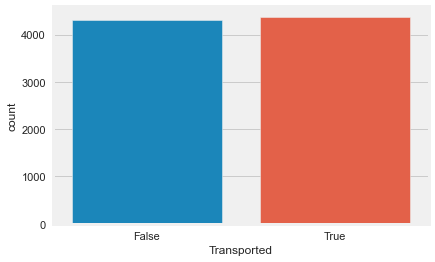

In [281]:
sns.countplot(df.Transported)

In [282]:
pd.unique(df.HomePlanet)

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [283]:
df.groupby(["Transported"]).mean()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Transported,,,,,,
False,29.922858,389.266066,382.615930,167.566217,564.382666,543.629822
True,27.748834,63.098021,532.691984,179.829972,61.675531,69.148131


In [284]:
df.replace(to_replace=[True, False], value=[1,0], inplace=True)

In [285]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,0.0,A/0/S,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,0.0,A/0/S,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,0.0,F/1/S,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0.0,A/98/P,55 Cancri e,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0
8689,9278_01,Earth,1.0,G/1499/S,PSO J318.5-22,18.0,0.0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0
8690,9279_01,Earth,0.0,G/1500/S,TRAPPIST-1e,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1
8691,9280_01,Europa,0.0,E/608/S,55 Cancri e,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0


In [286]:
printb (f" number of tRANSPORTED PEOPLR from Erop = {df["Transported"][(df.Transported ==1) &(df.HomePlanet=="Europa")].count()"")

SyntaxError: f-string: unmatched '[' (2227755607.py, line 1)

In [287]:
print(f" number of tRANSPORTED PEOPLR from Erop {df["Transported"][(df.Transported ==1) &(df.HomePlanet=="Europa")].count()}")

SyntaxError: f-string: unmatched '[' (4036070350.py, line 1)

In [288]:
df.HomePlanet.value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [289]:
%matplotlib inline

<AxesSubplot:title={'center':'Passenger Planet'}, xlabel='HomePlanet', ylabel='count'>

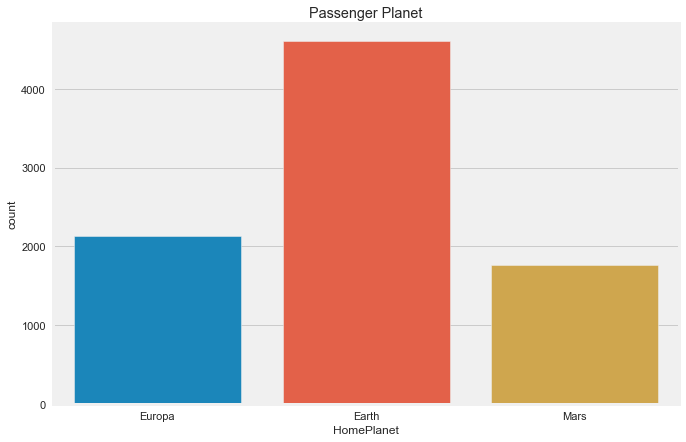

In [290]:
plt.figure(figsize=(10,7))
plt.title("Passenger Planet")
sns.countplot(df.HomePlanet)

In [291]:
df1= df[df.Transported==1]
df1.HomePlanet.value_counts()

Earth     1951
Europa    1404
Mars       920
Name: HomePlanet, dtype: int64

Shape of your Data Set loaded: (8693, 14)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    14 Predictors classified...
        1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 21


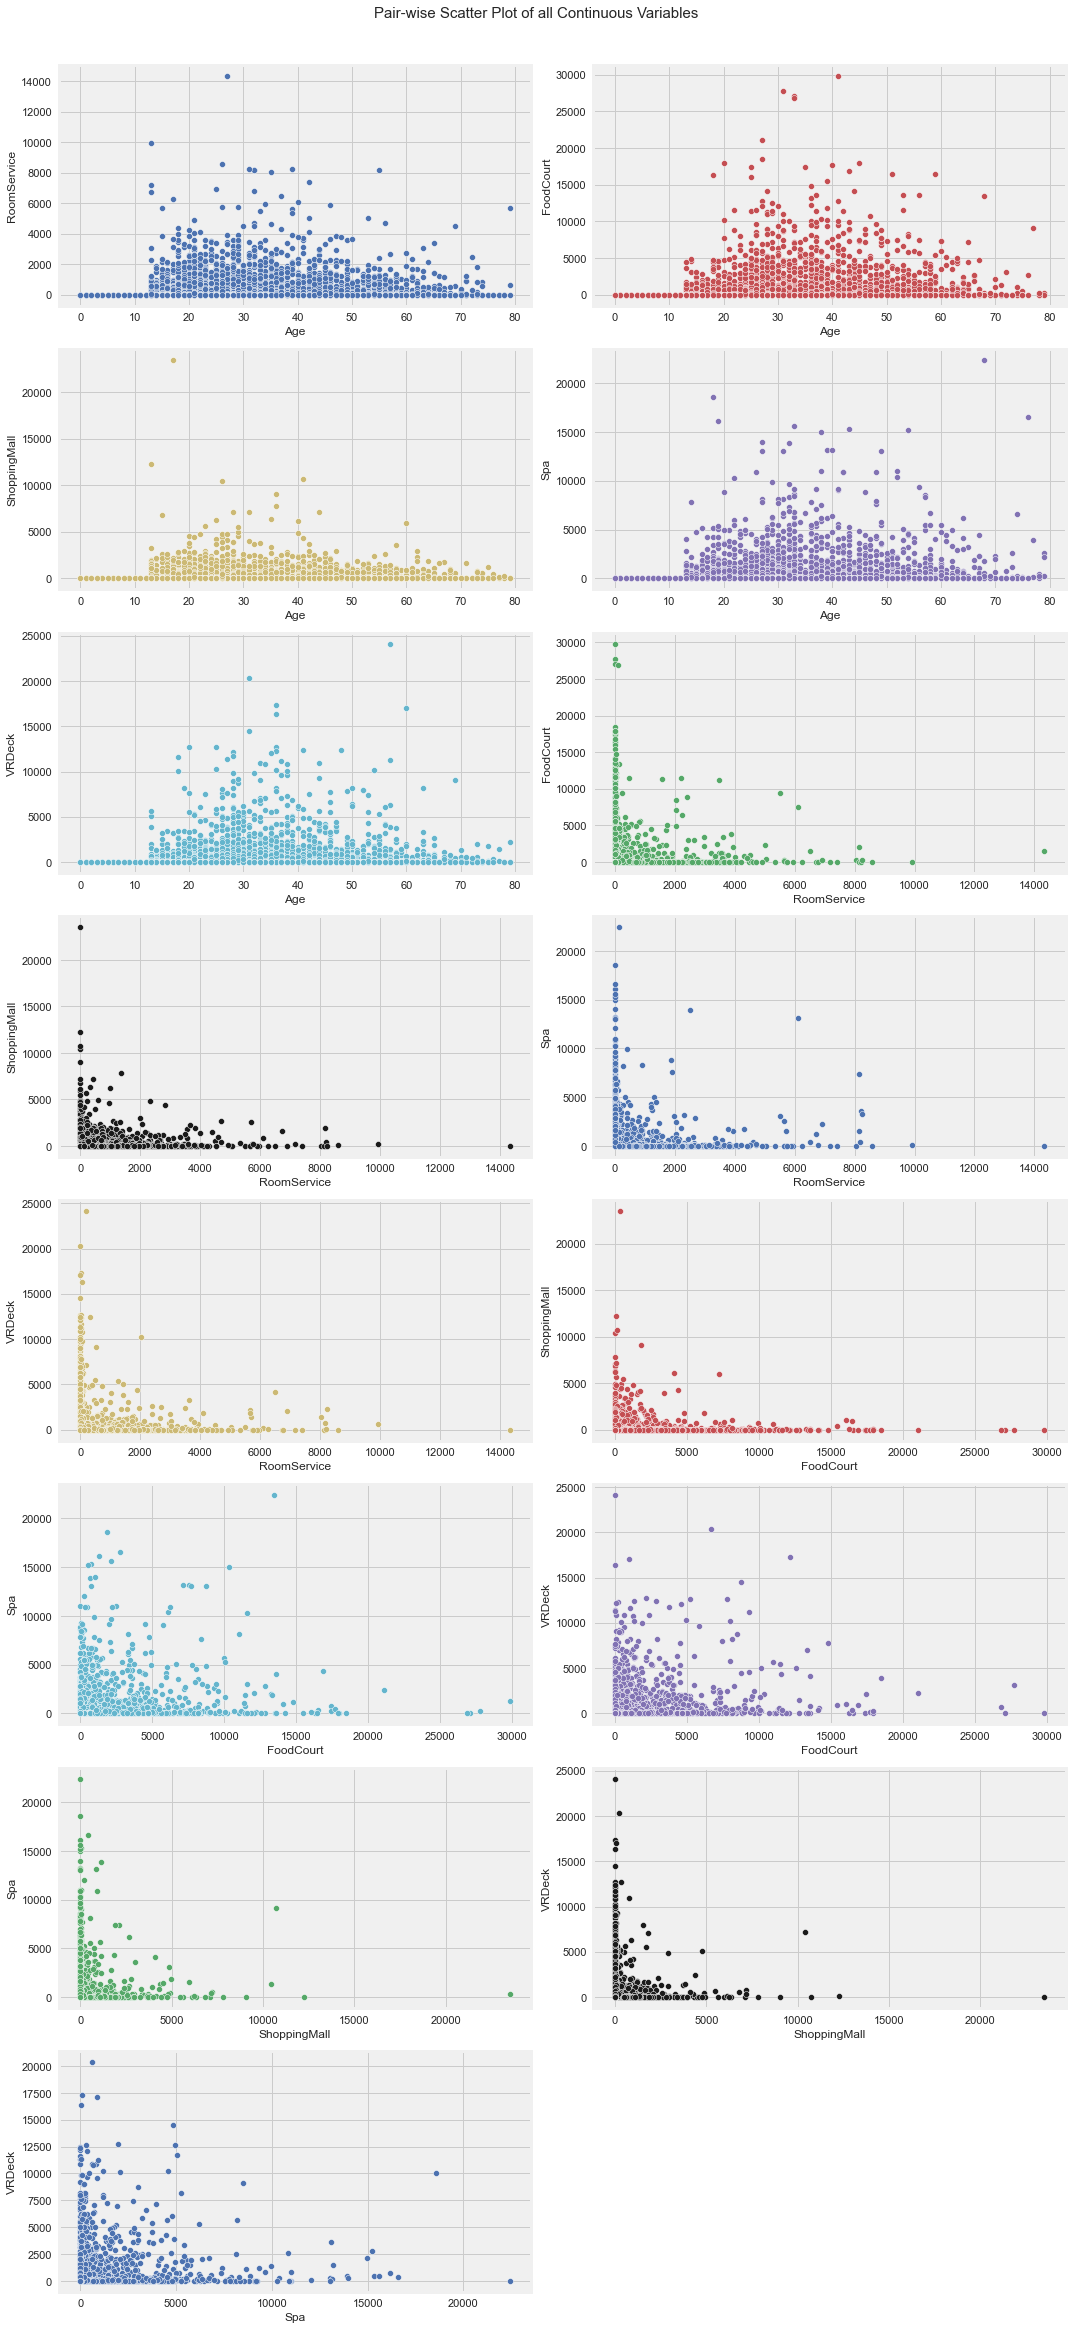

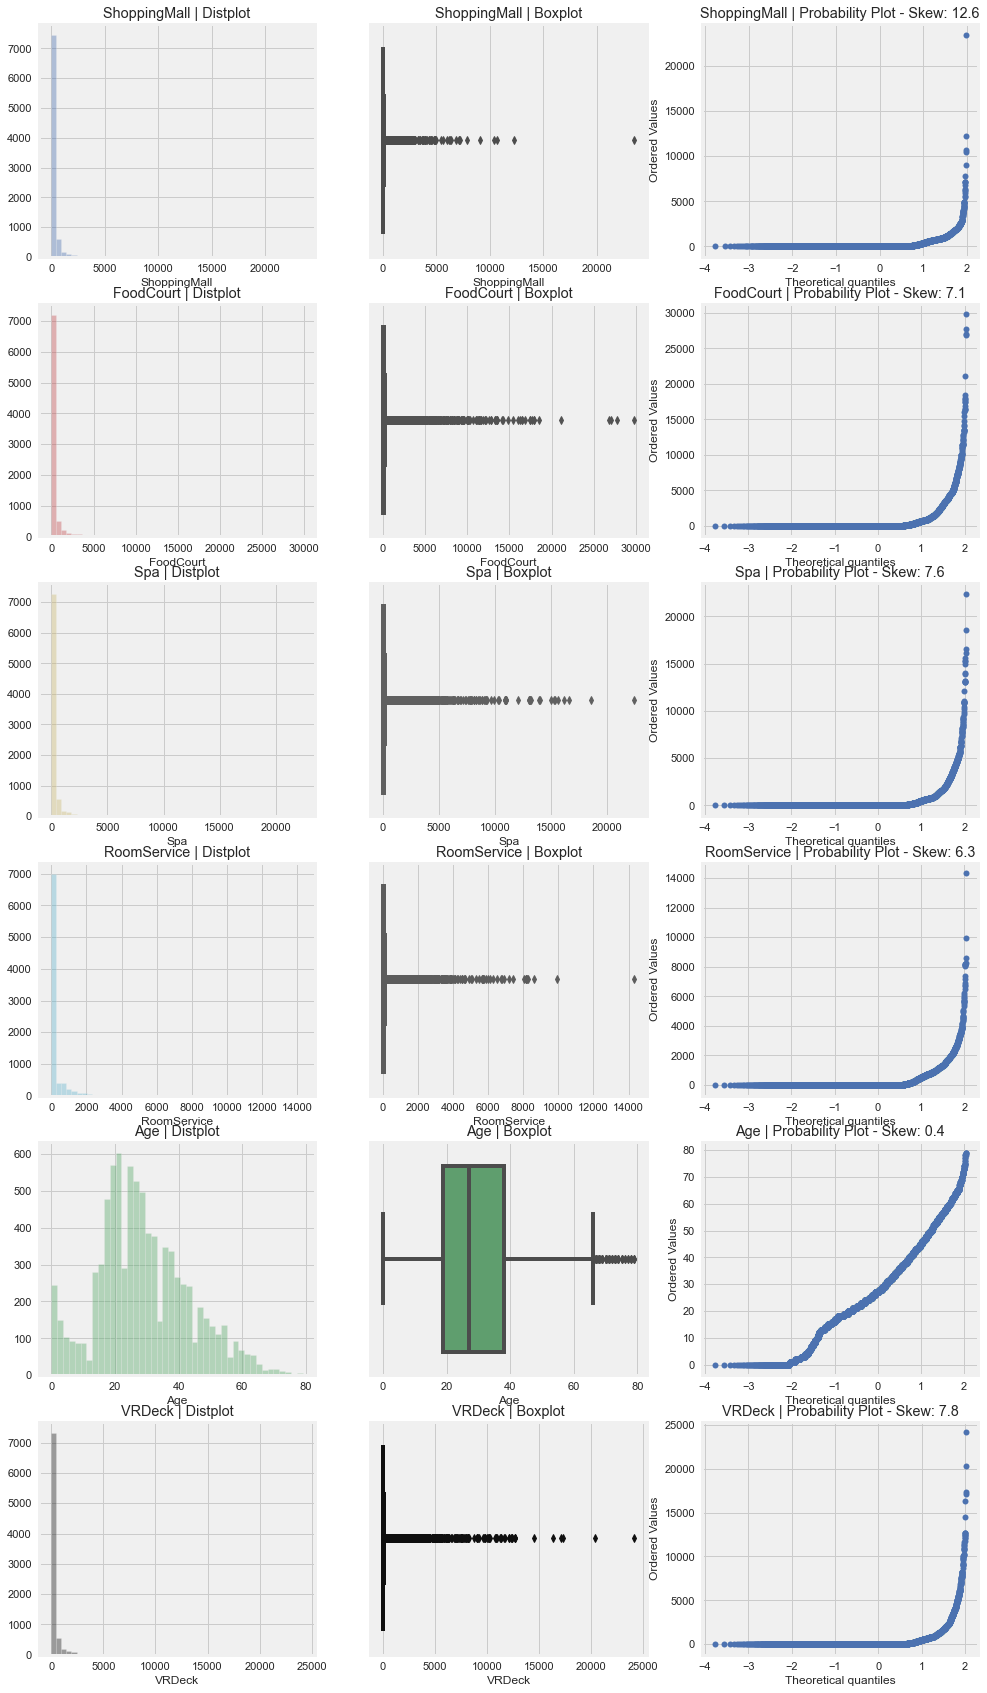

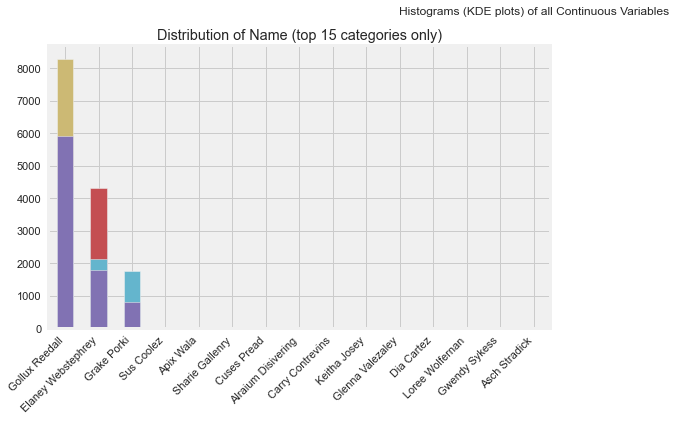

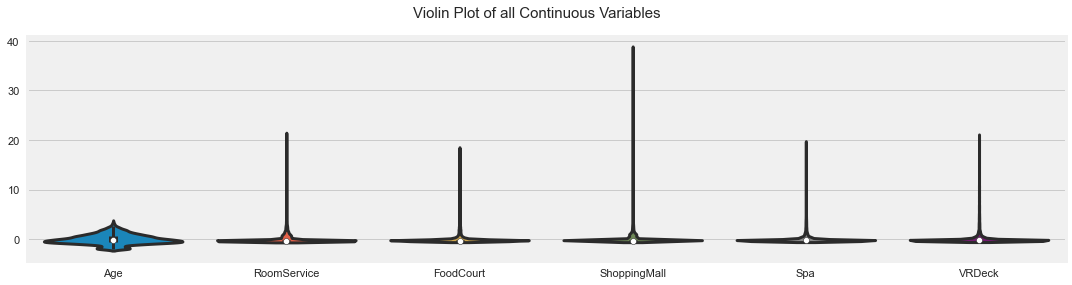

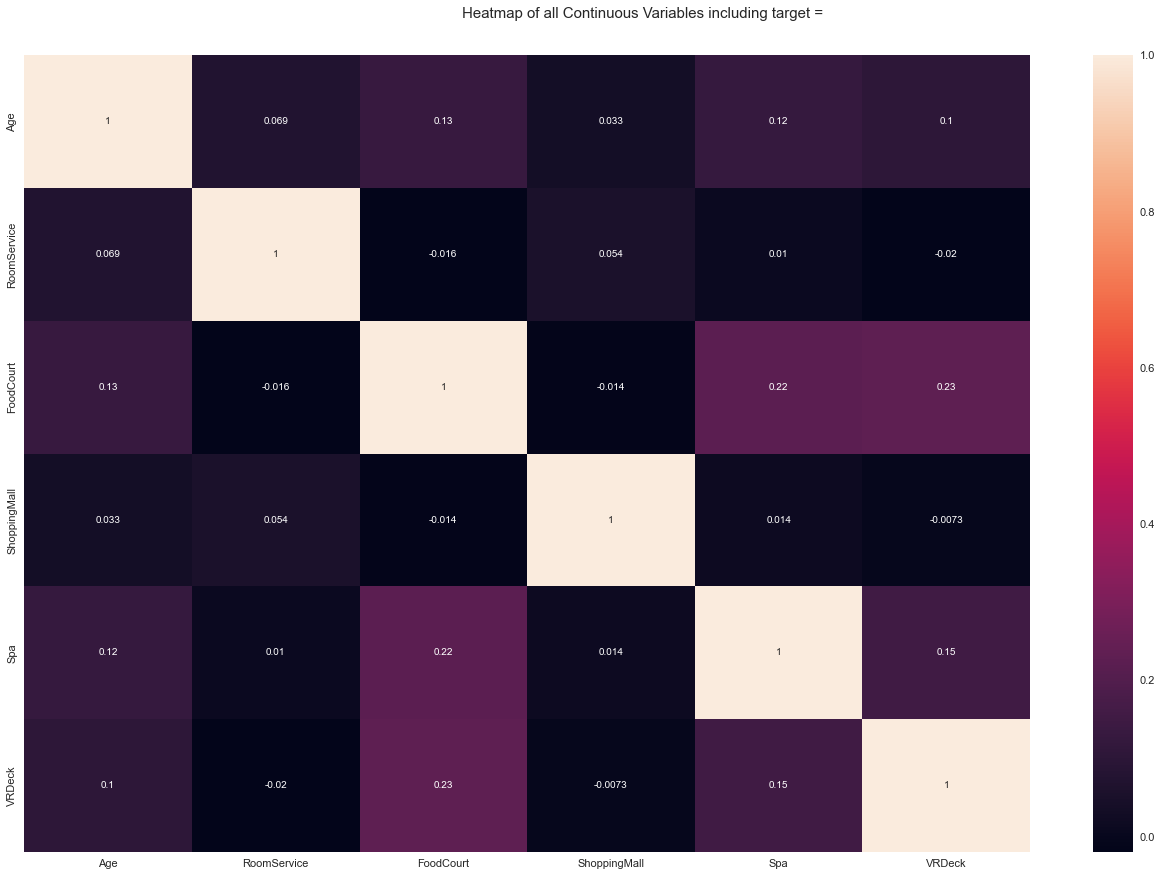

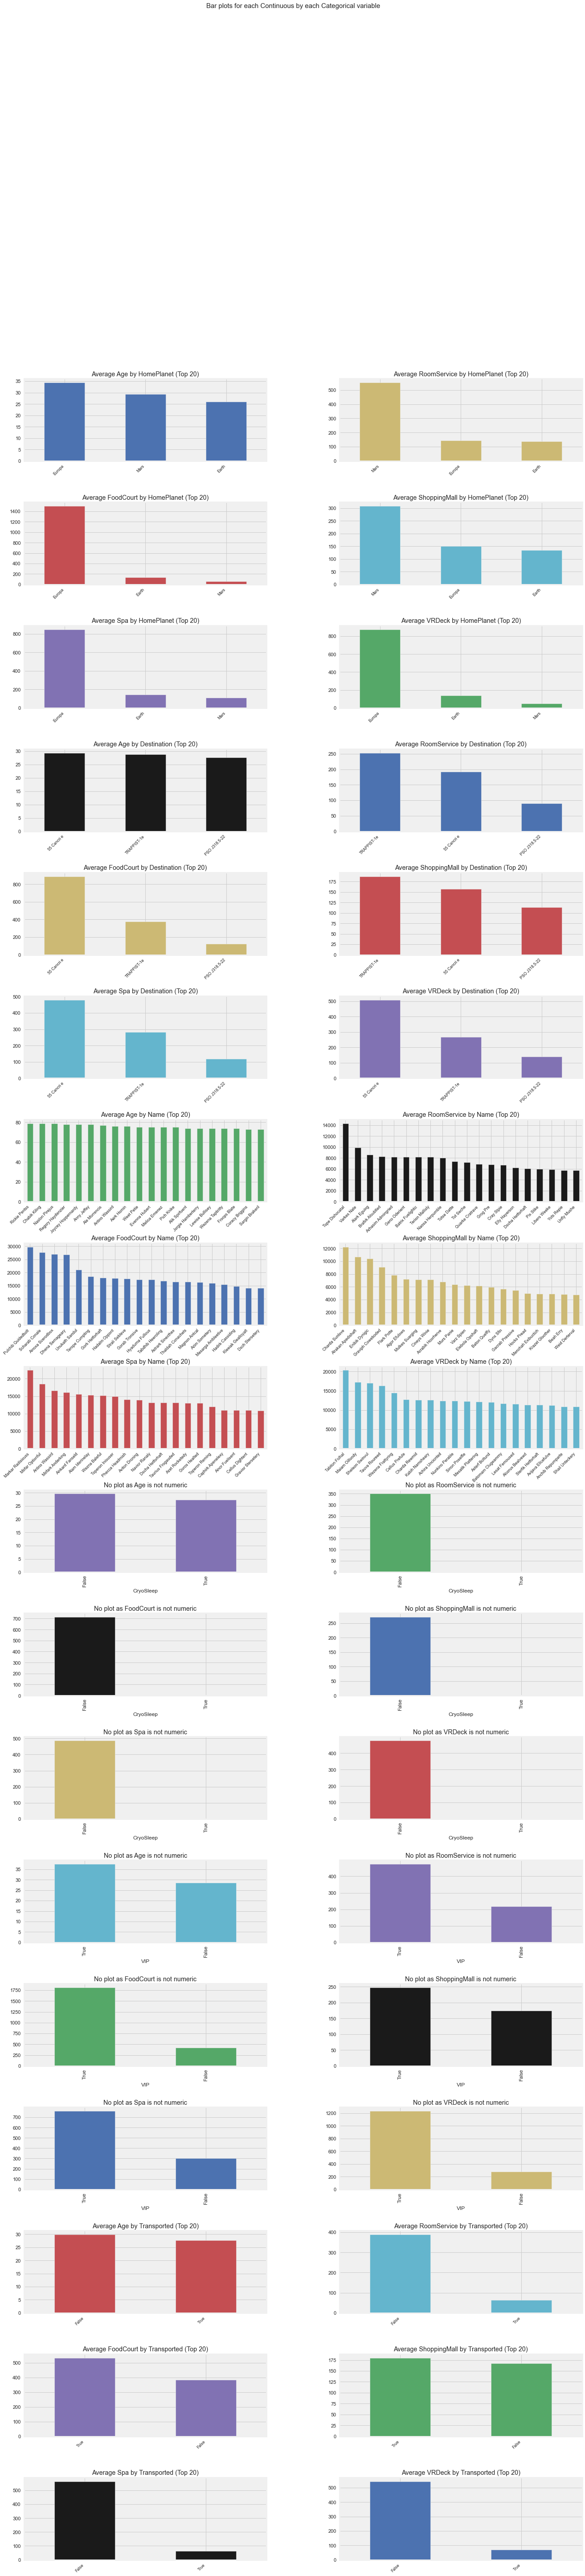


**********************************************************************
  Resource punkt not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('punkt')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load tokenizers/punkt/english.pickle

  Searched in:
    - 'C:\\Users\\dell/nltk_data'
    - 'C:\\Users\\dell\\AppData\\Local\\Programs\\Python\\Python39\\nltk_data'
    - 'C:\\Users\\dell\\AppData\\Local\\Programs\\Python\\Python39\\share\\nltk_data'
    - 'C:\\Users\\dell\\AppData\\Local\\Programs\\Python\\Python39\\lib\\nltk_data'
    - 'C:\\Users\\dell\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************

Could not draw wordcloud plot for Cabin
All Plots done
Time to run AutoViz = 18 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


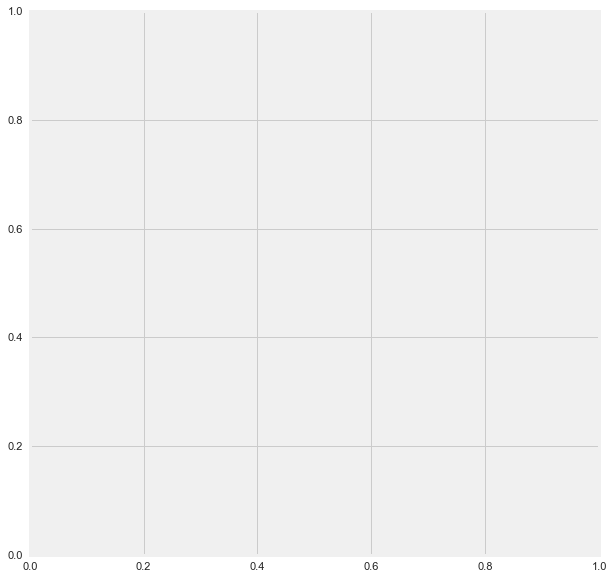

In [292]:
filename="train.csv"
from autoviz.AutoViz_Class import AutoViz_Class
AV= AutoViz_Class()
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
    save_plot_dir=None
)

In [293]:
df.groupby(['Age']).mean()

,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,,,,,,,,
0.0,0.405714,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.808989
1.0,0.646154,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.731343
2.0,0.628571,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.706667
3.0,0.630137,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.786667
4.0,0.500000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.746479
...,...,...,...,...,...,...,...,...
75.0,0.500000,0.0,0.000000,123.25,306.000000,43.666667,475.250000,0.500000
76.0,0.500000,0.0,0.000000,1366.00,211.000000,8297.000000,165.000000,0.500000
77.0,0.000000,0.0,0.000000,9032.00,65.500000,2054.500000,786.000000,0.500000


In [294]:
len(df.Transported[(df.Transported==1 )& (df.Age >= 20)])

3017

In [295]:
len(df.Transported[(df.Transported==1 )& (df.ShoppingMall >= 1000)])

219

<AxesSubplot:xlabel='Age', ylabel='count'>

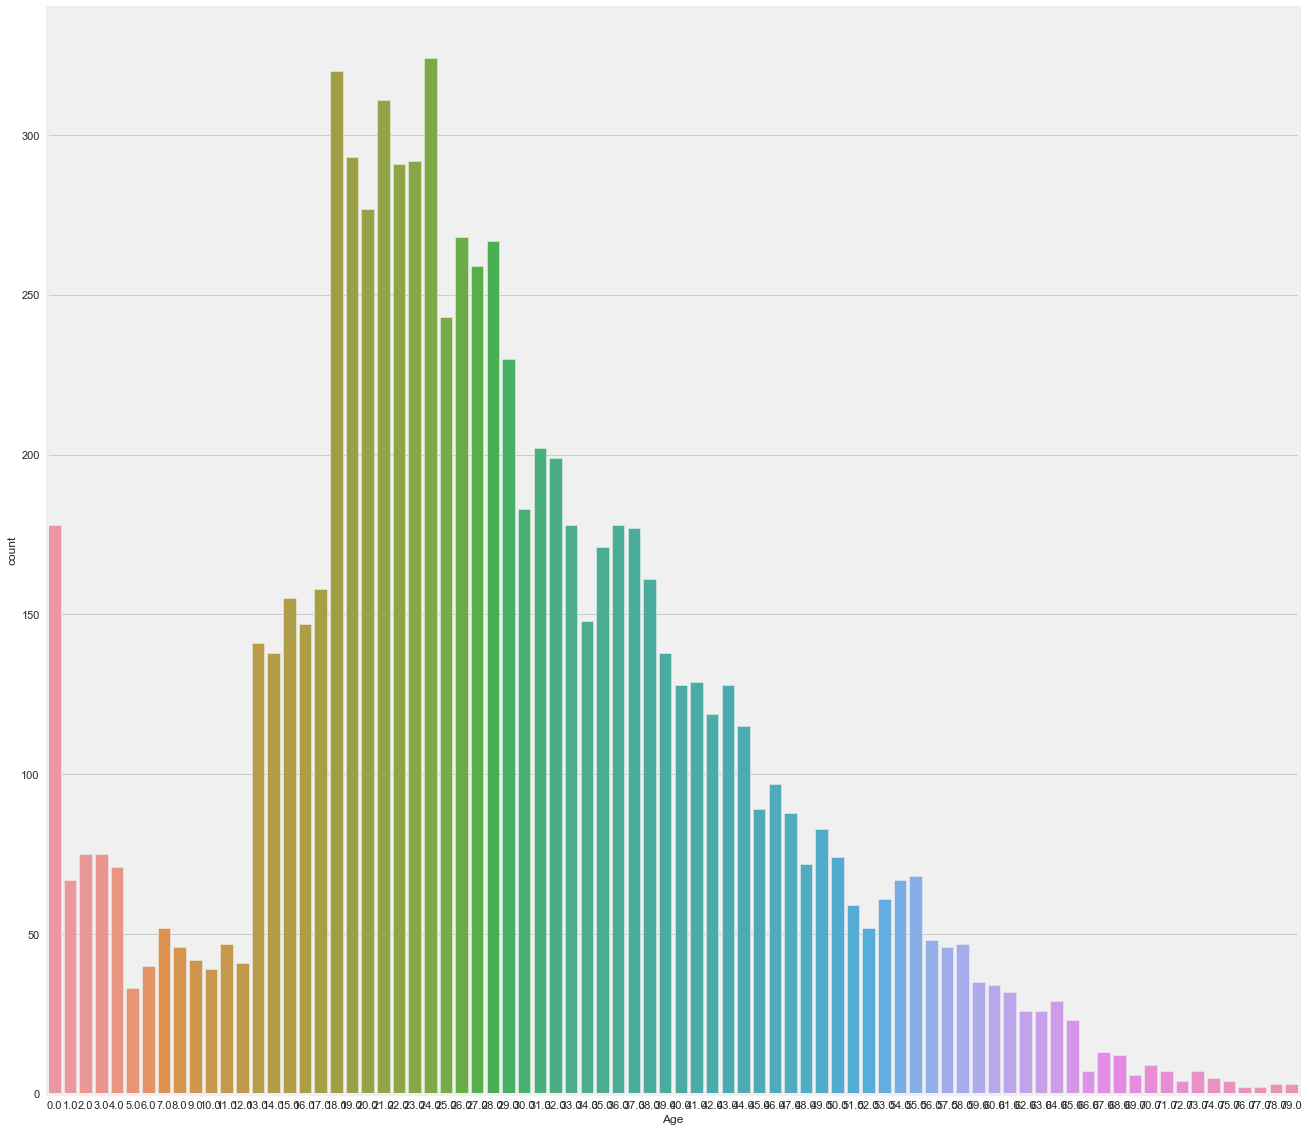

In [296]:
plt.figure(figsize=(20,20))
sns.countplot(df.Age)

<AxesSubplot:xlabel='Age', ylabel='count'>

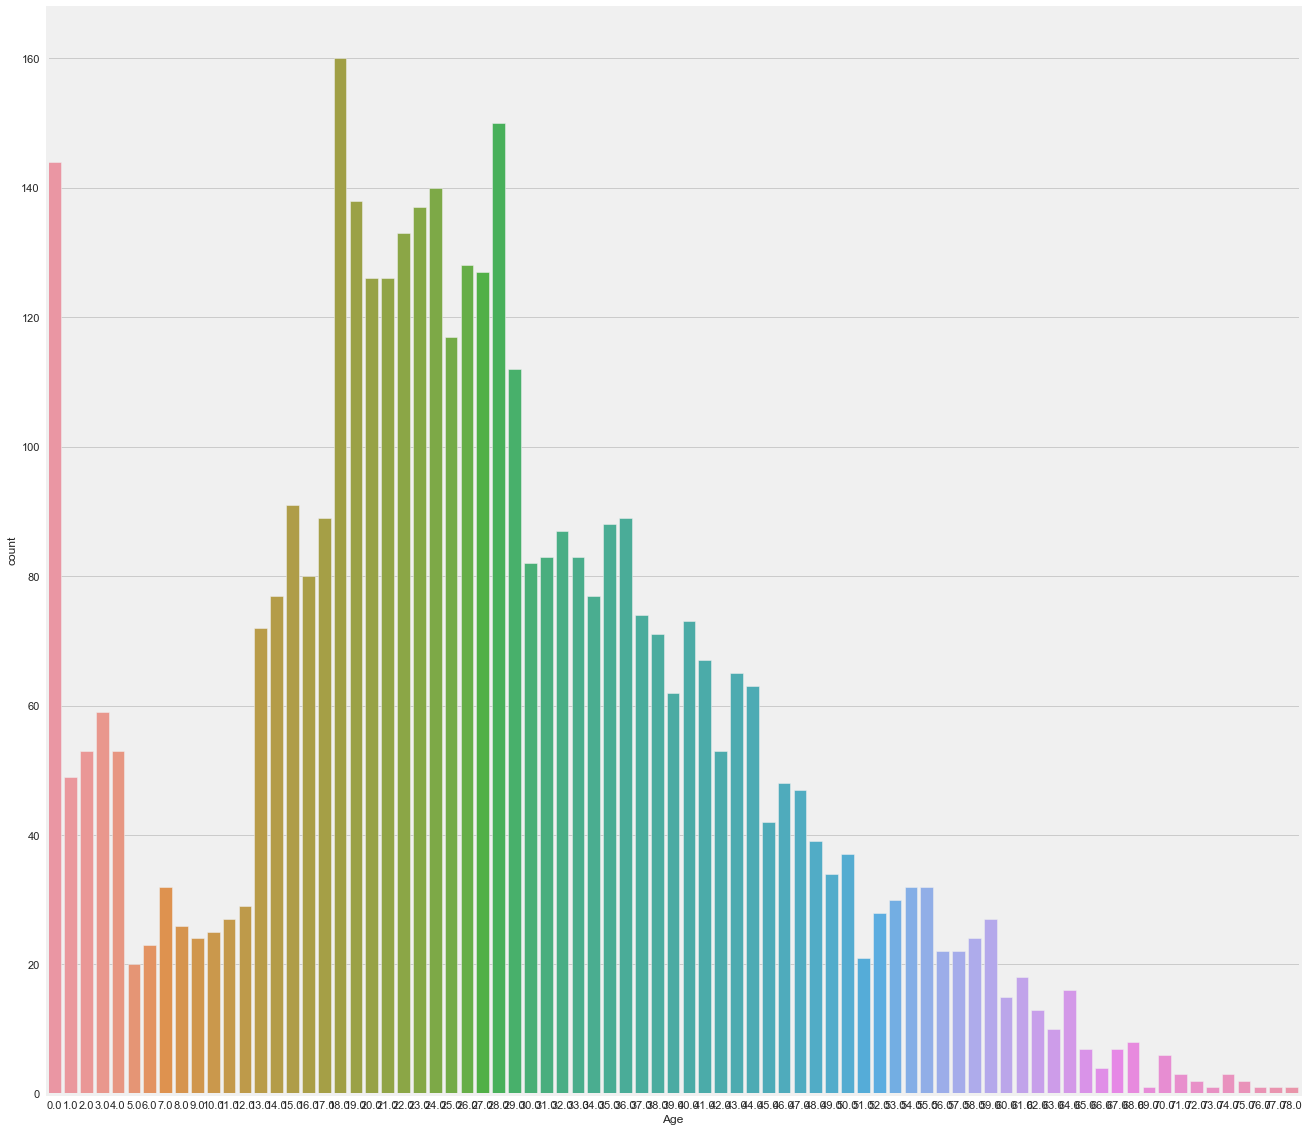

In [297]:
df1.Age.value_counts()
plt.figure(figsize=(20,20))
sns.countplot(df1.Age)

We note that the largest percentage of transport was for young people and young children from infants to the age of 45

In [298]:
new_df= df[["HomePlanet",'CryoSleep','Age', 'VIP',  'Transported' ]]
new_df

,HomePlanet,CryoSleep,Age,VIP,Transported
0,Europa,0.0,39.0,0.0,0
1,Earth,0.0,24.0,0.0,1
2,Europa,0.0,58.0,1.0,0
3,Europa,0.0,33.0,0.0,0
4,Earth,0.0,16.0,0.0,1
...,...,...,...,...,...
8688,Europa,0.0,41.0,1.0,0
8689,Earth,1.0,18.0,0.0,0
8690,Earth,0.0,26.0,0.0,1
8691,Europa,0.0,32.0,0.0,0


In [299]:
df.VIP.value_counts()

0.0    8291
1.0     199
Name: VIP, dtype: int64

<h1> Feature scaling and Data preprocessing </h1>

    -------------------
<h2>drop nan values </h2>

In [300]:
new_df.isnull().sum()

HomePlanet     201
CryoSleep      217
Age            179
VIP            203
Transported      0
dtype: int64

In [301]:
new_df= new_df.dropna()

In [302]:
new_df.describe()

,CryoSleep,Age,VIP,Transported
count,7914.000000,7914.000000,7914.000000,7914.000000
mean,0.354941,28.874779,0.024008,0.503412
std,0.478526,14.464994,0.153084,0.500020
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,0.000000,0.000000
50%,0.000000,27.000000,0.000000,1.000000
75%,1.000000,38.000000,0.000000,1.000000
max,1.000000,79.000000,1.000000,1.000000


In [303]:
new_df.isna().sum()

HomePlanet     0
CryoSleep      0
Age            0
VIP            0
Transported    0
dtype: int64

In [304]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
l_p= le.fit_transform(new_df.HomePlanet)
new_df["l_HomePlanet"]= l_p
new_df= new_df.drop(["HomePlanet"], axis=1)

<h2> Split and Normalization data</h1>

In [305]:
X= new_df.drop(['Transported'] ,axis=1)
y=new_df.Transported

In [306]:
scaler = RobustScaler().fit(X)
X_scale = scaler.transform(X)
X_scale = pd.DataFrame(X_scale, columns = X.columns)

In [307]:
X_scale

,CryoSleep,Age,VIP,l_HomePlanet
0,0.0,0.631579,0.0,1.0
1,0.0,-0.157895,0.0,0.0
2,0.0,1.631579,1.0,1.0
3,0.0,0.315789,0.0,1.0
4,0.0,-0.578947,0.0,0.0
...,...,...,...,...
7909,0.0,0.736842,1.0,1.0
7910,1.0,-0.473684,0.0,0.0
7911,0.0,-0.052632,0.0,0.0
7912,0.0,0.263158,0.0,1.0


In [308]:
X=X_scale

<h3>Train-Test Split </h3>

In [309]:
#split our data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11)
print(f"We have {len(X_train)} Training data\nWe have {len(X_test)} Testing data")


We have 5935 Training data
We have 1979 Testing data


<h1>Modeling</h1>

In [310]:
def kfolds(model, model_name):
    model = cross_val_score(model, X,y, cv=5)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")

def train(model, model_name):
    model.fit(X_train, y_train)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")

def conf_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt='d');
    
def class_report(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    
def roc(model, model_name):
    y_pred_svm = model.decision_function(X_test)
    svm_fpr, svm_tpr, _ = roc_curve(y_test, y_pred_svm)
    auc_svm = auc(svm_fpr, svm_tpr)
    plt.figure(figsize=(5, 5), dpi=100)
    plt.plot(svm_fpr, svm_tpr, color="darkorange", label=f'{model_name} (auc = %0.3f)' % auc_svm)
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlabel('False Positive Rate -->')
    plt.ylabel('True Positive Rate -->')
    plt.legend()
    plt.show()

 <h2>Logistic Regression</h2>

In [311]:
lr_model = LogisticRegression()
kfolds(lr_model, "Logistic Regression")
train(lr_model, "Logistic Regression")

Logistic Regression score on cross validation: 72.40350819748066%
Logistic Regression model score on Training data: 72.5189553496209%
Logistic Regression model score on Testing data: 71.80394138453765%


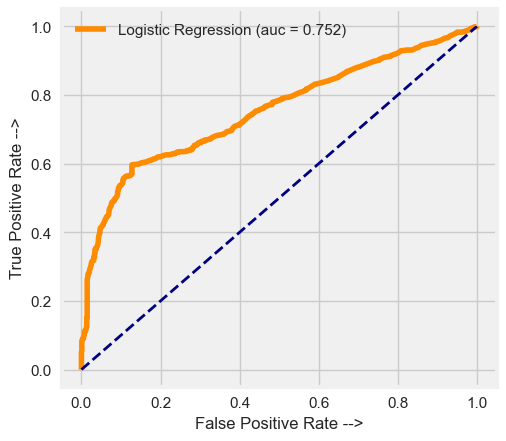

In [312]:
roc(lr_model, "Logistic Regression")

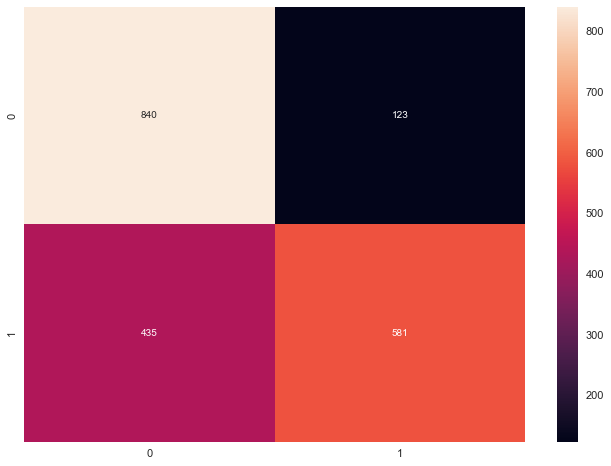

In [313]:
conf_matrix(lr_model)

<h1>Random Forest</h1> 

In [314]:
rf_model = RandomForestClassifier(n_estimators=70, random_state=100)
kfolds(rf_model, "Random Forest")
train(rf_model, "Random Forest")

Random Forest score on cross validation: 72.44139494135302%
Random Forest model score on Training data: 75.60235888795283%
Random Forest model score on Testing data: 72.56189994946944%


<h1>KNN</h1>

In [315]:
knn_model = KNeighborsClassifier(n_neighbors=3)
kfolds(knn_model, "KNN")
train(knn_model, "KNN")

KNN score on cross validation: 67.46277012473716%
KNN model score on Training data: 71.82813816343725%
KNN model score on Testing data: 69.02475997978777%


_________class_report_______
              precision    recall  f1-score   support

           0       0.66      0.75      0.70       963
           1       0.73      0.63      0.68      1016

    accuracy                           0.69      1979
   macro avg       0.69      0.69      0.69      1979
weighted avg       0.70      0.69      0.69      1979

None
_________con matrecis________
None


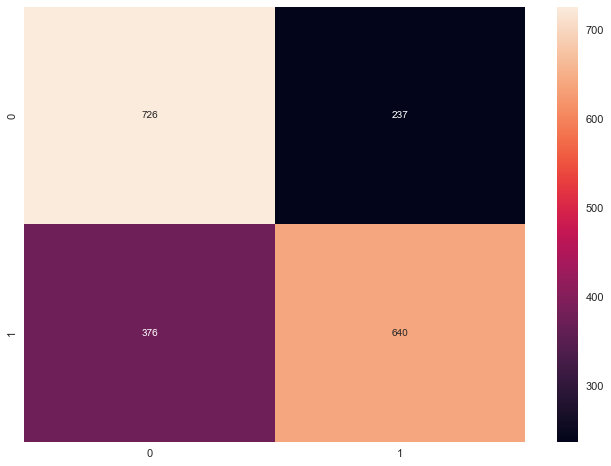

In [316]:

print("_________class_report_______")
print(class_report(knn_model))

print("_________con matrecis________")
print(conf_matrix(knn_model))
